### PROJECT 5: Storytelling Data Visualization on Exchange Rate
Target: analyse the exchange rate from euros to us dollars and euros to pound

[Source](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020)

![](euro.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2021.csv')

In [3]:
exchange_rates.columns

Index(['Period\Unit:', '[Argentine peso ]', '[Australian dollar ]',
       '[Bulgarian lev ]', '[Brazilian real ]', '[Canadian dollar ]',
       '[Swiss franc ]', '[Chinese yuan renminbi ]', '[Cypriot pound ]',
       '[Czech koruna ]', '[Danish krone ]', '[Algerian dinar ]',
       '[Estonian kroon ]', '[UK pound sterling ]', '[Greek drachma ]',
       '[Hong Kong dollar ]', '[Croatian kuna ]', '[Hungarian forint ]',
       '[Indonesian rupiah ]', '[Israeli shekel ]', '[Indian rupee ]',
       '[Iceland krona ]', '[Japanese yen ]', '[Korean won ]',
       '[Lithuanian litas ]', '[Latvian lats ]', '[Moroccan dirham ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]',
       '[New Taiwan dollar ]

In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5878 non-null   object 
 1   [Argentine peso ]         5383 non-null   object 
 2   [Australian dollar ]      5878 non-null   object 
 3   [Bulgarian lev ]          5476 non-null   object 
 4   [Brazilian real ]         5610 non-null   object 
 5   [Canadian dollar ]        5878 non-null   object 
 6   [Swiss franc ]            5878 non-null   object 
 7   [Chinese yuan renminbi ]  5610 non-null   object 
 8   [Cypriot pound ]          2346 non-null   object 
 9   [Czech koruna ]           5878 non-null   object 
 10  [Danish krone ]           5878 non-null   object 
 11  [Algerian dinar ]         5383 non-null   object 
 12  [Estonian kroon ]         3130 non-null   object 
 13  [UK pound sterling ]      5878 non-null   object 
 14  [Greek d

In [5]:
exchange_rates.head(3)

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,2021-09-20,NaN,1.6201,1.9558,6.2495,1.5056,1.0883,7.5726,NaN,25.432,...,86.0700,10.2173,1.5839,NaN,NaN,39.0620,10.1512,NaN,1.1711,17.3301
1,2021-09-17,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,...,85.4338,10.1553,1.5851,NaN,NaN,39.1450,10.1323,NaN,1.1780,17.1891
2,2021-09-16,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,...,85.2347,10.1518,1.5805,NaN,NaN,38.9180,9.9663,NaN,1.1763,17.0544


In [6]:
exchange_rates.tail(3)

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
5875,1999-01-06,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,...,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,NaN,1.1743,6.7307
5876,1999-01-05,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,...,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,NaN,1.1790,6.7975
5877,1999-01-04,NaN,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,...,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,NaN,1.1789,6.9358


In [7]:
exchange_rates.rename(columns={'Period\\Unit:':'time',
                               '[US dollar ]':'usd',
                               '[UK pound sterling ]':'gdp'},inplace=True)
exchange_rates['time'] = pd.to_datetime(exchange_rates['time'])

In [8]:
#https://realpython.com/python-f-strings/
#https://gist.github.com/minism/1590432
print(f'\033[32m\033[1mNumber of rows:\033[0m\t\t{exchange_rates.shape[0]}\n'
      f'\033[43m\033[32m\033[1mNumber of columns:\033[0m\t{exchange_rates.shape[1]}\n'
      f'\033[32m\033[1mMissing data:\033[0m\t\n{exchange_rates.isnull().sum()*100/len(exchange_rates)}')


Number of rows:		5878
Number of columns:	45
Missing data:	
time                         0.000000
[Argentine peso ]            8.421232
[Australian dollar ]         0.000000
[Bulgarian lev ]             6.839061
[Brazilian real ]            4.559374
[Canadian dollar ]           0.000000
[Swiss franc ]               0.000000
[Chinese yuan renminbi ]     4.559374
[Cypriot pound ]            60.088465
[Czech koruna ]              0.000000
[Danish krone ]              0.000000
[Algerian dinar ]            8.421232
[Estonian kroon ]           46.750595
gdp                          0.000000
[Greek drachma ]            91.153454
[Hong Kong dollar ]          0.000000
[Croatian kuna ]             4.559374
[Hungarian forint ]          0.000000
[Indonesian rupiah ]         0.000000
[Israeli shekel ]            4.559374
[Indian rupee ]              4.559374
[Iceland krona ]            40.949302
[Japanese yen ]              0.000000
[Korean won ]                0.000000
[Lithuanian litas ]         2

In [9]:
exchange_rates.shape

(5878, 45)

In [10]:
euro_usd = exchange_rates[['time','usd']]
euro_gdp = exchange_rates[['time','gdp']]
euro_usd['usd'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3373     6
          ..
1.3759     1
1.5741     1
1.4545     1
1.0882     1
1.1500     1
Name: usd, Length: 3576, dtype: int64

In [11]:
euro_usd['usd'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3373     6
          ..
1.3759     1
1.5741     1
1.4545     1
1.0882     1
1.1500     1
Name: usd, Length: 3576, dtype: int64

In [12]:
euro_usd = euro_usd[euro_usd['usd']!='-']
euro_usd['usd'] = euro_usd['usd'].astype('float')
euro_usd['usd'].value_counts(bins=10).sort_index()

(0.823, 0.903]     333
(0.903, 0.98]      302
(0.98, 1.057]      292
(1.057, 1.135]    1141
(1.135, 1.212]     998
(1.212, 1.289]     905
(1.289, 1.367]    1046
(1.367, 1.444]     476
(1.444, 1.522]     215
(1.522, 1.599]     108
Name: usd, dtype: int64

In [13]:
euro_gdp = euro_gdp[euro_gdp['gdp']!='-']
euro_gdp['gdp'] = euro_gdp['gdp'].astype('float')
euro_gdp['gdp'].value_counts(bins=10).sort_index()


(0.57, 0.612]      201
(0.612, 0.653]     674
(0.653, 0.693]    1103
(0.693, 0.734]     508
(0.734, 0.775]     172
(0.775, 0.816]     588
(0.816, 0.856]     840
(0.856, 0.897]    1324
(0.897, 0.938]     390
(0.938, 0.979]      16
Name: gdp, dtype: int64

In [14]:
#https://en.wikipedia.org/wiki/Moving_average
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html?highlight=rolling

euro_usd['rolling_mean'] = euro_usd['usd'].rolling(30).mean()

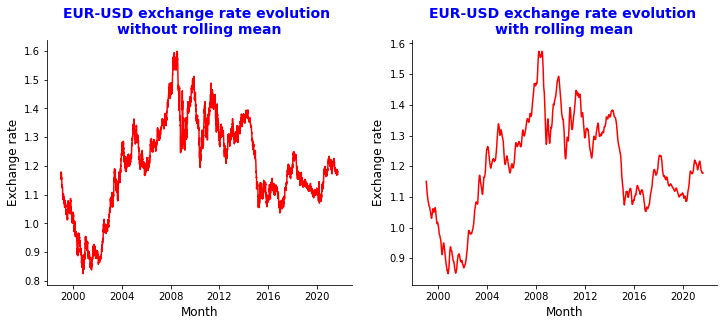

In [15]:
plt.figure(figsize=(12,4.5))

plt.subplot(1,2,1)
plt.plot(euro_usd['time'],euro_usd['usd'],color='red')
plt.title('EUR-USD exchange rate evolution \nwithout rolling mean',fontsize = 14,weight='bold', color='blue')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Exchange rate',fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1,2,2)
plt.plot(euro_usd['time'],euro_usd['rolling_mean'],color='red')
plt.title('EUR-USD exchange rate evolution \nwith rolling mean',fontsize = 14,weight='bold',color='blue')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Exchange rate',fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()


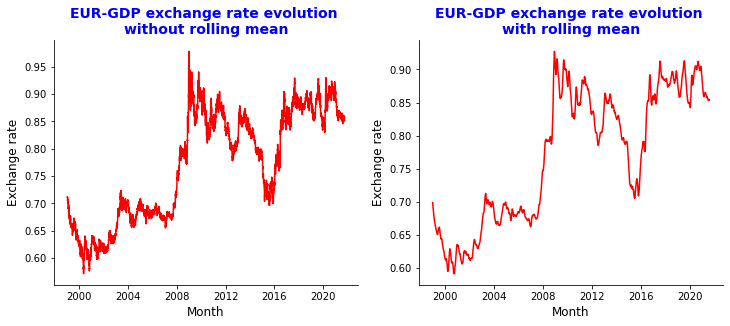

In [16]:
euro_gdp['rolling_mean'] = euro_gdp['gdp'].rolling(30).mean()
plt.figure(figsize=(12,4.5))

plt.subplot(1,2,1)
plt.plot(euro_gdp['time'],euro_gdp['gdp'],color='red')
plt.title('EUR-GDP exchange rate evolution \nwithout rolling mean',fontsize = 14,weight='bold', color='blue')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Exchange rate',fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1,2,2)
plt.plot(euro_gdp['time'],euro_gdp['rolling_mean'],color='red')
plt.title('EUR-GDP exchange rate evolution \nwith rolling mean',fontsize = 14,weight='bold',color='blue')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Exchange rate',fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

In [17]:
crisis = euro_usd[(euro_usd['time'].dt.year >=2006)&(euro_usd['time'].dt.year <=2009)]
crisis_78 = euro_usd[(euro_usd['time'].dt.year >=2007)&(euro_usd['time'].dt.year <=2008)]

In [18]:
crisis_78.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 3270 to 3791
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          511 non-null    datetime64[ns]
 1   usd           511 non-null    float64       
 2   rolling_mean  511 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 16.0 KB


(13077.05, 14681.95)
(1.1748048333333332, 1.5933585)


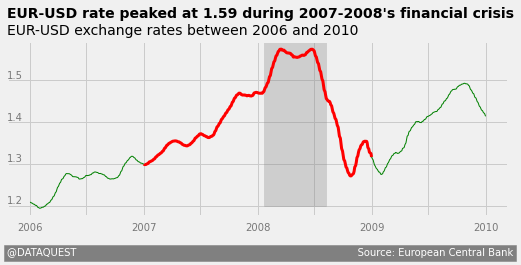

In [19]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvspan.html
style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(crisis['time'],crisis['rolling_mean'],linewidth=1,color='green')
ax.plot(crisis_78['time'],crisis_78['rolling_mean'],linewidth=3,color='red')
ax.set_xticklabels([])
ax.set_yticklabels([])
x=13110
for year in ['2006','2007','2008','2009','2010']:
    ax.text(x,1.14,year,alpha=0.5,fontsize=10)
    x += 365
y = 1.205    
for rate in ['1.2','1.3','1.4','1.5']:
    ax.text(13077,y,rate,alpha=0.5,fontsize=10)
    y += 0.1
ax.text(13077,1.65,'EUR-USD rate peaked at 1.59 during 2007-2008\'s financial crisis',weight='bold')
ax.text(13077,1.61,'EUR-USD exchange rates between 2006 and 2010')
ax.text(13077,1.08,'@DATAQUEST'+ ' '*90+'Source: European Central Bank',
        color='white',backgroundcolor='grey',size=10)
ax.axvspan(xmin=13900,xmax=14097,ymin=0.06,color='grey',alpha=0.3)
print(plt.xlim())
print(plt.ylim())
plt.show()

In [20]:
bush_obama_trump = euro_usd[(euro_usd['time'].dt.year >=2001)&(euro_usd['time'].dt.year <=2020)]
bush = bush_obama_trump[bush_obama_trump['time'].dt.year <=2008]
obama = bush_obama_trump[(bush_obama_trump['time'].dt.year > 2008)&(bush_obama_trump['time'].dt.year <=2016)]
trump = bush_obama_trump[(bush_obama_trump['time'].dt.year > 2016)&(bush_obama_trump['time'].dt.year <=2020)]

(10958.85, 18992.15)
(0.8, 1.7)


Text(10858, 2.3, 'EUR-USD rate averaged 1.22 under the last US presidents')

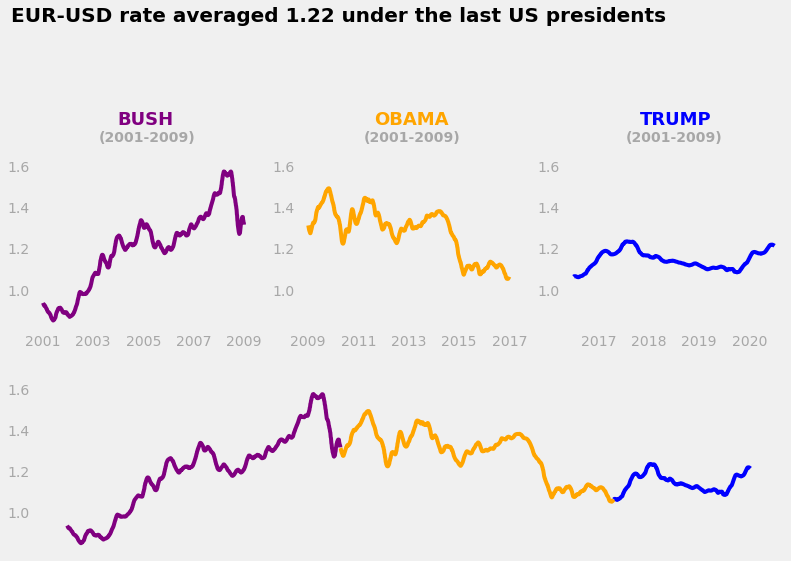

In [21]:
style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

ax1.plot(bush['time'],bush['rolling_mean'],color='purple')
ax2.plot(obama['time'],obama['rolling_mean'],color='orange')
ax3.plot(trump['time'],trump['rolling_mean'],color='blue')

ax4.plot(bush['time'],bush['rolling_mean'],color='purple')
ax4.plot(obama['time'],obama['rolling_mean'],color='orange')
ax4.plot(trump['time'],trump['rolling_mean'],color='blue')

axes=[ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(['1.0','1.2','1.4','1.6'],alpha=0.3)
    ax.grid(alpha=0.3)

ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'],alpha=0.3)
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'],alpha=0.3)
ax3.set_xticklabels(['','2017','','2018','','2019','','2020','','2021'],alpha=0.3)
ax4.set_xticklabels([])
print(plt.xlim())
print(plt.ylim())
ax1.text(12400,1.8,'BUSH',fontsize=18,weight='bold',color = 'purple')
ax1.text(12140,1.72,('(2001-2009)'),weight='bold',alpha = 0.3)
ax2.text(15200,1.8,'OBAMA',fontsize=18,weight='bold',color = 'orange')
ax2.text(15050,1.72,('(2001-2009)'),weight='bold',alpha = 0.3)
ax3.text(17650,1.8,'TRUMP',fontsize=18,weight='bold',color = 'blue')
ax3.text(17550,1.72,('(2001-2009)'),weight='bold',alpha = 0.3)

ax1.text(10858,2.3,'EUR-USD rate averaged 1.22 under the last US presidents', fontsize=20, weight='bold')
#number 10858 is a size de titre
ax1.text(10858,2.3,'''EUR-USD echange rqtes under George W.Bus(2001-2009), Barack Obama(2009-2017,)', fontsize=20, weight='bold')